# Heart Attack Analysis
# Edgar Filiberto Nava Barron
# ID: A01688818
## Background

The timely identification of cardiovascular disease cases and those at elevated risk, often attributed to factors like hypertension, diabetes, hyperlipidemia, or pre-existing cardiac conditions, stands as a paramount necessity. Through the adept utilization of machine learning algorithms and predictive modeling, these high-risk scenarios can be efficiently recognized and adeptly managed. The infusion of artificial intelligence and data-centric technologies stands poised to revolutionize healthcare, enabling prompt interventions, tailored treatment protocols, and improved patient outcomes.

In the grand scheme, the assimilation of machine learning into the prediction and management of cardiovascular diseases holds the potential to wield a transformative influence on global well-being. By harnessing the capabilities of advanced algorithms and the wealth of data at hand, we can collectively endeavor to alleviate the burden of CVDs, preserving lives, and enhancing the overall quality of existence for countless individuals worldwide. However, it remains paramount to underscore the need for continued research, validation, and judicious implementation to assure the reliability and efficacy of these machine learning models within authentic clinical contexts.

## Libraries & Notebook Settings

### Kaggle Settings

Upload the dataset from the source, either a local download or upload
In this case, we will load it directly from the source

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


### Libraries & Notebook Settings
Operating System: It can run on various operating systems, such as Windows, macOS or Linux.

     RAM Memory: It is recommended to have at least 4 GB of RAM to run these libraries and commands efficiently.

     Python version: It is recommended to have a version of Python 3.0(+) installed.

Make sure you have the necessary libraries installed. You can install them using the following code in your Jupyter Notebook or in your terminal before running the Notebook:

In [ ]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
%matplotlib inline

# The data

## Loading project data

In [ ]:
data = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
data.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


## Data exploration

**Age:** Age of the patient

**Sex:** Sex of the patient

**cp:** Chest Pain type chest pain type:

- *Value 1:* typical angina
- *Value 2:* atypical angina
- *Value 3:* non-anginal pain
- *Value 4:* asymptomatic

**trtbps:** resting blood pressure (in mm Hg)

**chol:** cholestoral in mg/dl fetched via BMI sensor

**fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**restecg:** resting electrocardiographic results:

- *Value 0:* normal
- *Value 1:* having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- *Value 2:* showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalachh:** maximum heart rate achieved

**exng:** exercise induced angina (1 = yes; 0 = no)

**oldpeak:** Previous peak

**slp:** Slope

**caa:** number of major vessels

**thall:** Thalium Stress Test result ~ (0,3)

**target:**
- *0:* Less chance of heart attack
- *1:* More chance of heart attack

## Understanding the data structure

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.shape

(303, 14)

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
data[data.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
data = data.drop_duplicates(keep = 'first')

In [ ]:
data.describe(include = 'all')[1:]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Notes:
- The dataset comprises entirely of numeric columns, primarily represented as int64 data type. Therefore, the application of standardization methods will play a crucial role in preparing the data for the machine learning algorithm.

- Considering the limited number of observations available, it is important to exercise caution while selecting feature engineering techniques and machine learning algorithms to ensure optimal model performance.

- It is worth noting that the data is complete, with no missing values. Additionally, any duplicate values present in the dataset have been successfully identified and removed.

## General correlation

In [ ]:
continuous_vars = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
descrete_vars = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

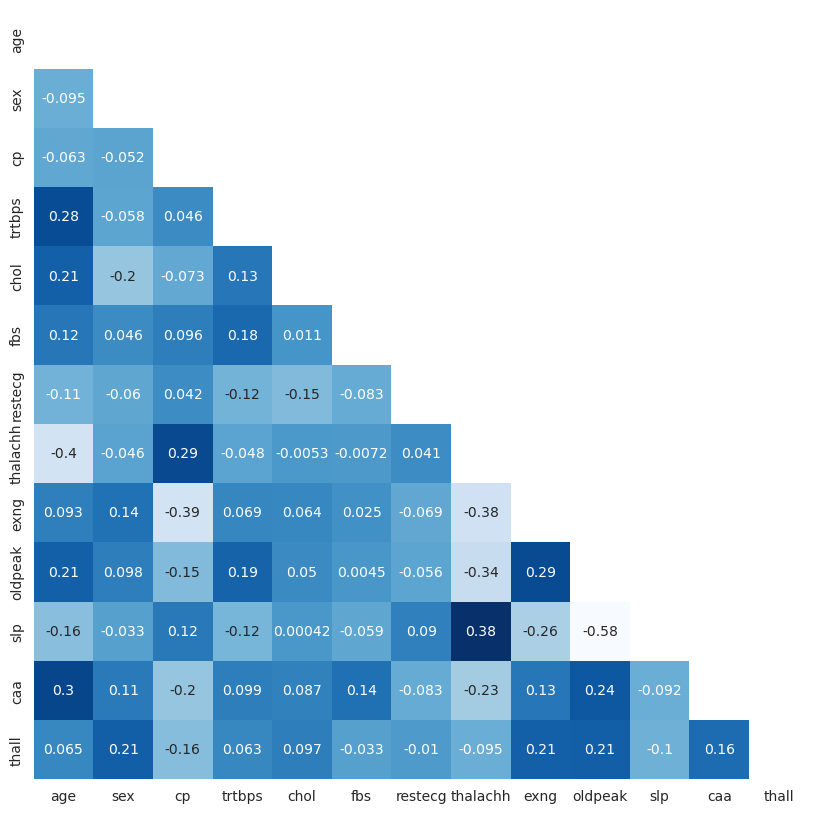

In [ ]:
correlations = data.drop("output", axis = 1).corr(method = 'pearson')

plt.figure(figsize = (10, 10))
sns.heatmap(data = correlations, annot = True,
            cmap = 'Blues', cbar  = False,
            mask = np.triu(correlations))

plt.grid(False);

### Notes
There are noteworthy correlations worth exploring between certain pairs of variables in the dataset:

1. "oldpeak" and "slp": Investigating the correlation between these two variables could provide valuable insights.

2. "cp" and "exng": There seems to be a correlation between these two variables that deserves further examination.

3. "thalachh" and "age": The relationship between these two variables could be significant and worth exploring.

4. "thalachh" and "slp": There might be an interesting correlation between these two variables that warrants investigation.

By exploring these correlations, we can gain a better understanding of the relationships within the data and potentially uncover patterns that may be useful for our analysis or machine learning tasks.

## Target

- *0:* Less chance of heart attack
- *1:* More chance of heart attack

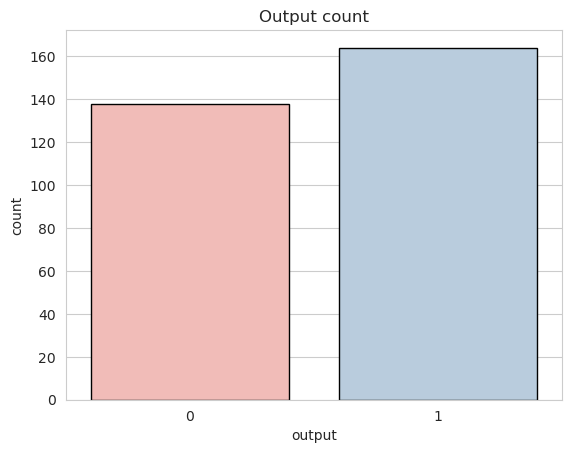

In [ ]:
sns.countplot(data = data, x = 'output', palette = 'Pastel1', edgecolor = 'k')
plt.title("Output count");

In [ ]:
data['output'].value_counts().to_frame()

,output
1,164
0,138


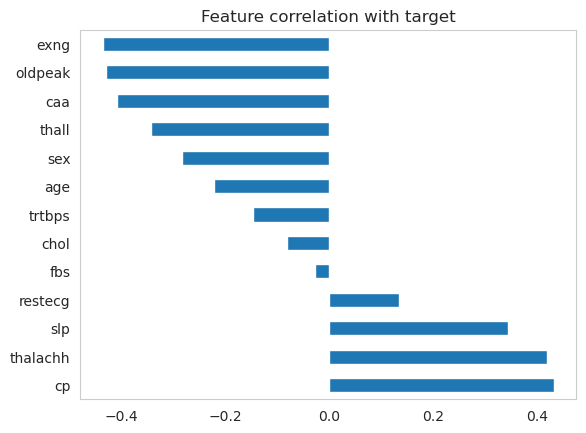

In [ ]:
data.corr(method = 'pearson')['output'].sort_values(ascending = False)[1:].plot(kind = 'barh')

plt.grid(False)
plt.title("Feature correlation with target");

In [ ]:
data.groupby("output").mean().round(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
output,,,,,,,,,,,,,
0,56.60,0.83,0.48,134.40,251.09,0.16,0.45,139.10,0.55,1.59,1.17,1.17,2.54
1,52.59,0.56,1.37,129.25,242.64,0.14,0.59,158.38,0.14,0.59,1.59,0.34,2.12


### Notes
- Despite the slight class imbalance with a higher number of observations corresponding to "1s" (indicating a higher chance of heart attack), it may not be necessary to transform the data to achieve a more balanced distribution. The dataset only contains 300 observations, and altering the class distribution might lead to loss of important information or negatively impact model performance.

- Several features, including "exng," "oldpeak," "caa," "cp," and "thalachh," show a strong correlation with the target variable. These correlations will be thoroughly explored later in the notebook to gain deeper insights into their relationships with the target variable. Analyzing these correlations can be valuable for building a robust machine learning model.

## General visualization

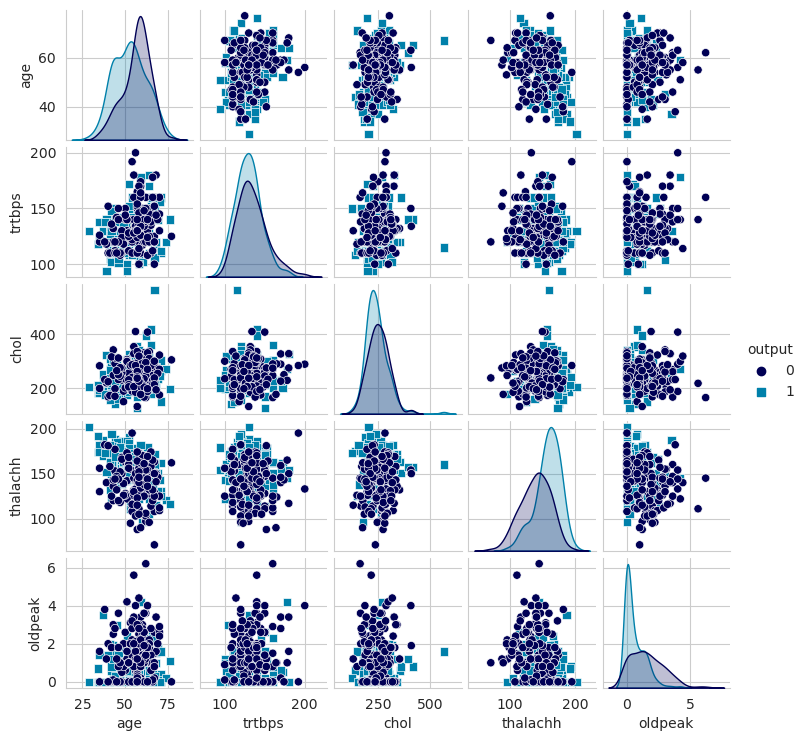

In [ ]:
sns.pairplot(data = data, vars = continuous_vars,
             hue = "output", palette = "ocean",
             height = 1.5, markers = ["o", "s"]);

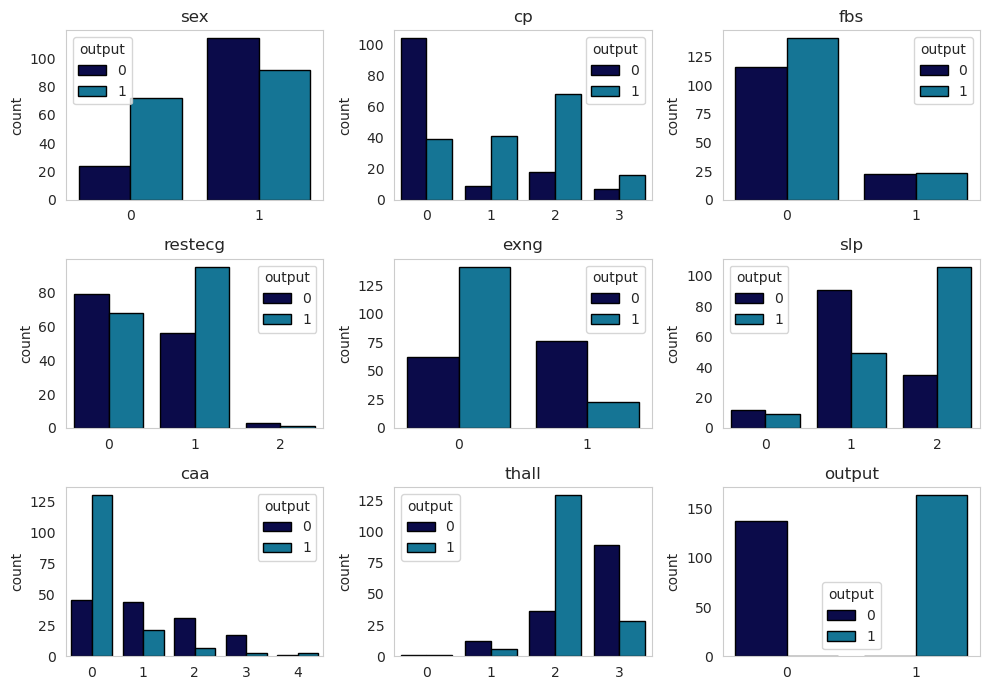

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(ncols = 3, nrows = 3, figsize = (10, 7))

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

for ax, feature in enumerate(descrete_vars):

    sns.countplot(data = data, x = feature, hue = "output",
                  ax = axes[ax], palette = 'ocean', edgecolor = 'k')
    axes[ax].set_title(feature)
    axes[ax].grid(False)
    axes[ax].set_xlabel('')

plt.tight_layout();

### Notes

- Features such as "cp" (chest pain type), "slp" (slope of the peak exercise ST segment), and "exng" (exercise induced angina) seem to play a significant role in determining individuals with low chances of a heart attack. People with specific values in these features may be less prone to heart issues.

- Conversely, a high value of "thalachh" (maximum heart rate achieved) can be a crucial indicator of individuals with a higher likelihood of experiencing a heart attack. However, when combined with factors like younger age, low "trtbps" (resting blood pressure), and low "chol" (serum cholesterol), it could be particularly dangerous.

- People who have a "caa" (number of major vessels colored by fluoroscopy) value of 0, "exng" value of 0, and "fbs" (fasting blood sugar) value of 0, are more likely to have a higher chance of heart attack.

- For those with "slp" of 2 and "restecg" (resting electrocardiographic results) of 1, there is a higher likelihood of experiencing a heart attack.

- The difference between "thall" (thalassemia) values of 2 and 3 can be critical since even a small variation in this feature might significantly impact the chances of getting a heart attack.

These observations are valuable insights for further analysis and building predictive models to better understand and assess the risk of heart attacks in individuals.

## Correlations

In [ ]:
HighCorrelation =  ["exng", "oldpeak", "caa", "thall", "cp", "slp", "thalachh"]

In [ ]:
def plot_correlations(feature, data = data, correlated = "output", descrete_vars = descrete_vars):

    fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (10, 3))

    if feature in descrete_vars:

        sns.countplot(data = data, x = feature, hue = "output", palette = "ocean", ax = ax1)
        ax1.set_title(f"{feature} count by output")
        ax1.set_ylabel(f"{feature}")
        sns.violinplot(data = data, y = feature, x = "output", palette = "ocean", split = True, ax = ax2)
        ax2.set_title(f"{feature} chances by output")
        sns.barplot(data = data, x = feature, y = "output", palette = "ocean", ax = ax3)
        ax3.set_title(f"Output mean by {feature}")
        ax1.grid(False)
        ax2.grid(False)
        ax3.grid(False)
        plt.plot();

    else:

        sns.distplot(data[data["output"] == 0][feature], kde = False, hist_kws = {'alpha':0.8}, ax = ax1, color = "#0b0b4a")
        sns.distplot(data[data["output"] == 1][feature], kde = False, hist_kws = {'alpha':0.8}, ax = ax1, color = "#157595")
        ax1.set_ylabel(f"{feature}")
        ax1.set_title(f"{feature} distribution by output")
        sns.boxplot(data = data, y = feature, x = 'output', ax = ax2, palette = 'ocean')
        ax2.set_title(f"{feature} boxplot by output")
        sns.swarmplot(data = data, x = feature, hue = 'output', palette = 'ocean',
              edgecolor = 'k', linewidth = 0.2, ax = ax3)
        ax3.set_title(f"{feature} distribution by output")
        ax1.grid(False)
        ax2.grid(False)
        ax3.grid(False)
        plt.plot();

    plt.tight_layout()

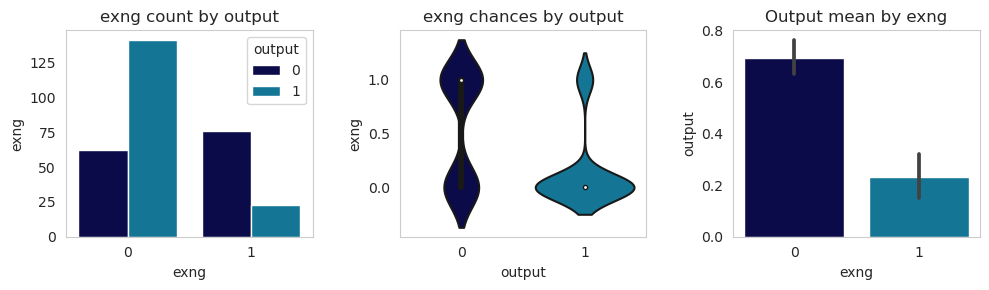

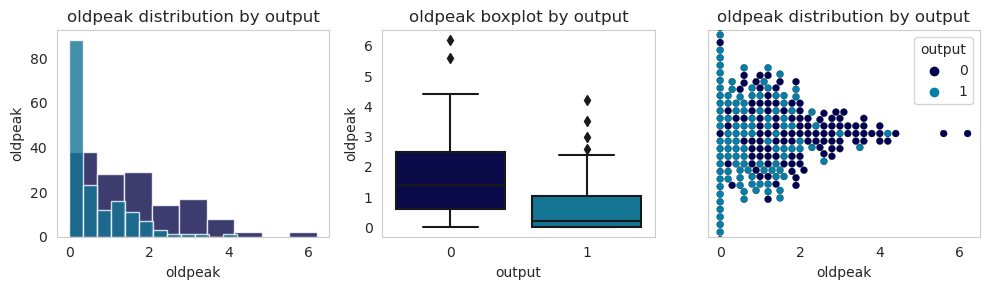

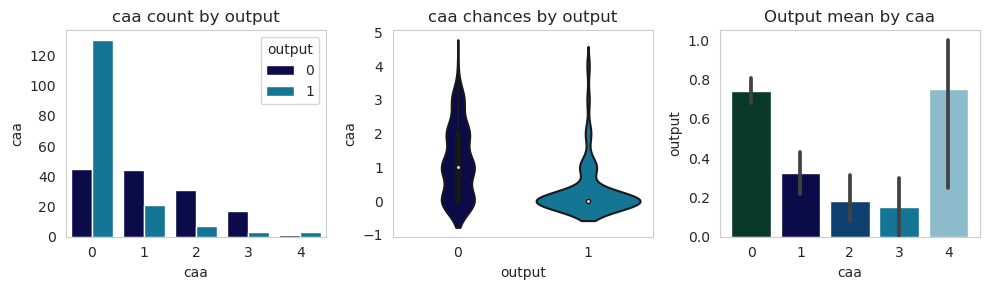

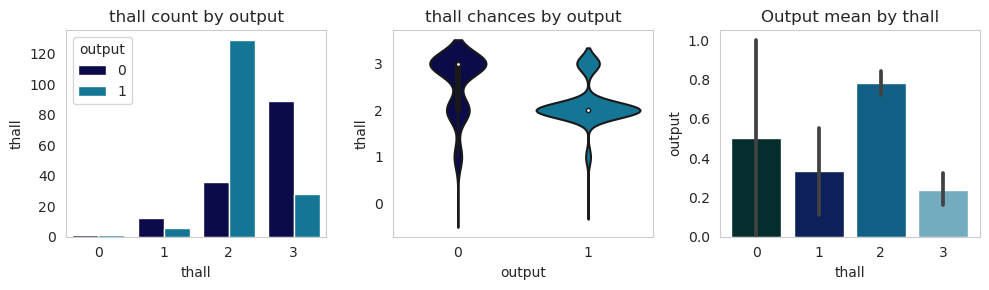

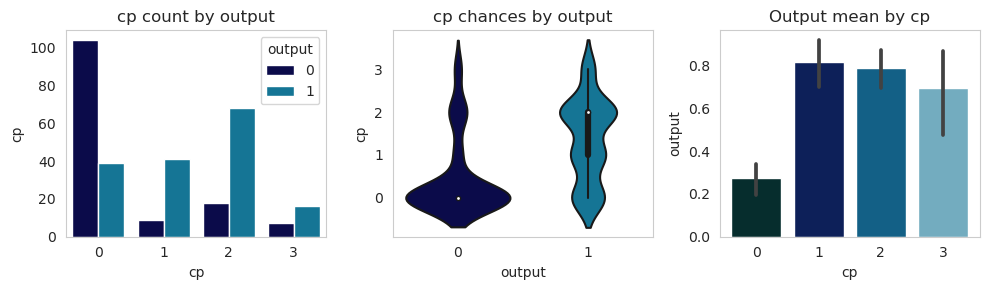

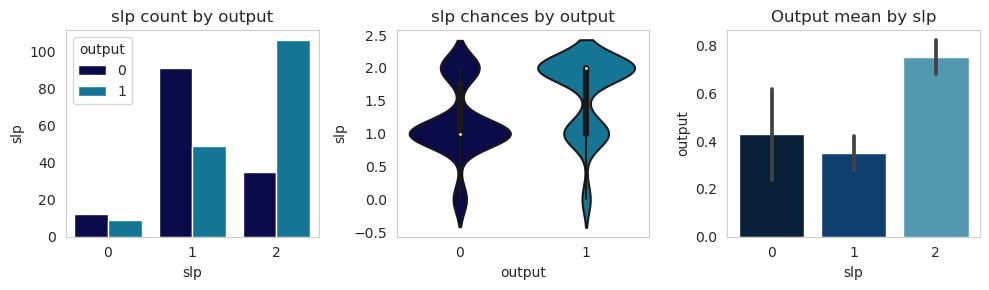

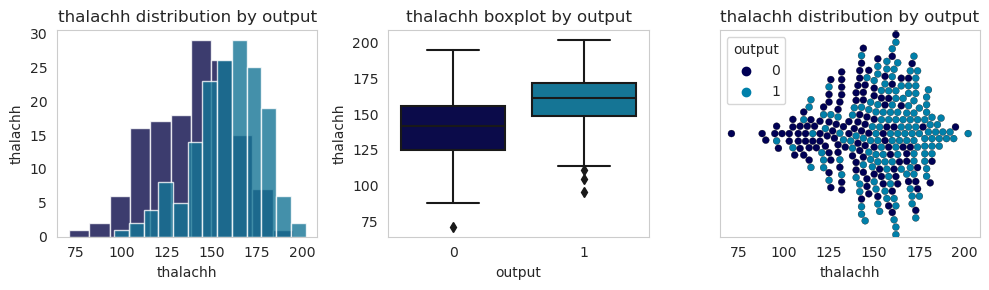

In [ ]:
for feature in HighCorrelation:

    plot_correlations(feature = feature)

### Notes

- An "exng" value of 0 is associated with an elevated risk of experiencing a heart attack. This means that individuals who do not experience exercise-induced angina (exng = 0) are more likely to have a heart attack compared to those who do (exng = 1).

- People who have a higher likelihood of having a heart attack tend to exhibit lower values of "oldpeak." "Oldpeak" is a measure used to assess the ST depression induced by exercise relative to rest on an electrocardiogram. Thus, a lower "oldpeak" value indicates a greater risk of experiencing a heart attack.

- When the variable "caa" (number of major vessels colored by fluoroscopy) has a value of 4, there is a substantial probability of it being associated with a heart attack. However, it is important to consider that this observation may be based on a limited sample size, as previously discussed in the notebook. Conversely, a "caa" value of 0 indicates a high probability of not suffering a heart attack in the future.

- A lower "thall" value is linked to better chances of not having a heart attack. Specifically, individuals with a "thall" value of 2 have a higher likelihood of avoiding a heart attack compared to those with a "thall" value of 3. It is essential to recognize that this discrepancy might be influenced by the presence of limited data points in certain "thall" categories.

- The risk of experiencing a heart attack increases with higher values of "cp" (chest pain type). Therefore, when identifying individuals with lower chances of a heart attack, it is advisable to focus on those with a "cp" value less than 1.

- As previously explored, individuals with an "slp" value of 2 exhibit the highest chances of having a heart attack, even though there might not be a clear increasing pattern in the data.

- A higher "thalachh" value (maximum heart rate achieved during exercise) is associated with an increased probability of having a heart attack. Therefore, individuals with higher "thalachh" values are at a greater risk compared to those with lower values.

# Machine Learning modeling (Model Training)

## Evaluation metrics

When evaluating classification machine learning problems, several metrics can be used to assess the performance of the model. For this problem I will be evaluating:

- **Accuracy:** Accuracy is a basic metric that measures the overall correctness of the model's predictions. It is the ratio of correct predictions to the total number of predictions and is calculated as (True Positives + True Negatives) / Total Predictions.

- **Precision:** Precision represents the proportion of true positive predictions out of all positive predictions made by the model. It helps to identify how many of the predicted positive cases are actually true positives. It is calculated as True Positives / (True Positives + False Positives).

- **Recall (Sensitivity or True Positive Rate):** Recall measures the proportion of true positive predictions out of all actual positive cases in the dataset. It indicates the model's ability to correctly identify positive instances. It is calculated as True Positives / (True Positives + False Negatives).

- **F1 Score:** The F1 score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance when precision and recall have different trade-offs. It is calculated as 2 * (Precision * Recall) / (Precision + Recall).

- **Area Under the Receiver Operating Characteristic Curve (AUC-ROC):** AUC-ROC evaluates the model's ability to distinguish between positive and negative instances across different probability thresholds. It plots the true positive rate (recall) against the false positive rate (1 - specificity) at various thresholds, and the AUC-ROC represents the area under this curve. A higher AUC-ROC indicates better model performance.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Baseline scores

Implementing baseline scores before evaluating an ML model is crucial as they provide a benchmark for performance comparison, act as a sanity check for correct implementation, justify the use of complex models, aid decision-making regarding feasibility and resource allocation, and enable progress tracking. For this case I will take into consideration 2 baseline scores:

- Zero Rate
- Random Rate Classifier (Weighted Guessing)


### Zero Rate

In [ ]:
ZeroR = accuracy_score(data["output"].values, np.zeros_like(data["output"].values))
ZeroR

0.45695364238410596

### Random Rate Classifier (Weighted Guessing)

In [ ]:
(data['output'].value_counts() / len(data)).to_frame()

,output
1,0.543046
0,0.456954


In [ ]:
WeightedG = (0.543046 ** 2) + (0.456954 ** 2)
WeightedG

0.5037059162320001

In [ ]:
Baseline = pd.DataFrame(data = [ZeroR, WeightedG], columns = ['Accuracy'], index = ['Zero Rate', 'Random Rate Classifier'])
Baseline

,Accuracy
Zero Rate,0.456954
Random Rate Classifier,0.503706


## Feature engineering

Due to the limited size of the dataset, a conventional train-test split is not viable as it could lead to an unreliable assessment of the model's performance. To address this challenge, we are gonna adopt a more robust approach known as cross-validation. This technique involves dividing the data into multiple subsets or folds and then iteratively training and evaluating the model on different combinations of these folds. By doing so, cross-validation provides a more comprehensive and dependable evaluation of the model's effectiveness, enhancing its ability to generalize to new, unseen data.

Since all the features in the dataset are numeric, we are spared from dealing with certain challenges that often arise with categorical features, such as handling cardinality (large number of unique values) or addressing rare labels. This characteristic simplifies the feature engineering process and allows us to focus primarily on standardization to prepare the data for training the model.

### X, y



In [ ]:
# Reseting index

data = data.reset_index(drop = True)

In [ ]:
# Spliting into X, y

X = data.drop("output", axis = 1)
y = data["output"]

### Standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scaling will be done in the cross-validation

## Model Selection

Since the amount of data is very limited, I would like to try a large amount of classification model. For this problem I would like to try:

- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)
- Naive Bayes
- Gradient Boosting Machines (GBM)
- XGBoost
- LightGBM
- CatBoost
- AdaBoost
- LDA (Linear Discriminant Analysis)
- QDA (Quadratic Discriminant Analysis)
- Bagging Classifier
- Extra Trees Classifier
- Gaussian Process Classifier
- MLP (Multi-layer Perceptron)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
random_state = 18

Models = [LogisticRegression(random_state = random_state),
          DecisionTreeClassifier(random_state = random_state),
          RandomForestClassifier(random_state = random_state),
          SVC(probability = True, random_state = random_state, kernel = "linear"),
          SVC(probability = True, random_state = random_state, kernel = "rbf"),
          GaussianNB(),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state = random_state),
          LGBMClassifier(random_state = random_state, verbose = -1),
          XGBClassifier(random_state = random_state),
          CatBoostClassifier(random_state = random_state, verbose = False),
          AdaBoostClassifier(random_state = random_state),
          LinearDiscriminantAnalysis(),
          QuadraticDiscriminantAnalysis(),
          BaggingClassifier(random_state = random_state),
          ExtraTreesClassifier(random_state = random_state),
          GaussianProcessClassifier(random_state = random_state),
          MLPClassifier(random_state = random_state)]

ModelsName = ['Logistic Regression', 'Decision Trees','Random Forest',
              'SVM (Linear)', 'SVM (RBF)','Naive Bayes','K-Nearest Neighbors',
              'Gradient Boosting', 'LightGBM', 'XGBoost', 'CatBoost', 'AdaBoost',
              'LinearDiscriminantAnalysis', 'QuadraticDiscriminantAnalysis',
              'Bagging', 'ExtraTrees', 'GaussianProcess', 'MLPC']

## Cross-validation

As said before this technique involves dividing the data into multiple subsets or folds and then iteratively training and evaluating the model on different combinations of these folds. By doing so, cross-validation provides a more comprehensive and dependable evaluation of the model's effectiveness, enhancing its ability to generalize to new, unseen data.

In [ ]:
from sklearn.model_selection import StratifiedKFold

SGK = StratifiedKFold(n_splits = 10, shuffle = True, random_state = random_state)

In [ ]:
# Metrics arrays

accuracy, precision, recall, f1score, auc_roc = list(), list(), list(), list(), list()

# Information arrays
namelist, kfold = list(), list()

In [ ]:
def get_metrics(classifier, name, X_train, X_validation, y_train, y_validation):

     # Loading the model
    model = classifier

    # Fitting the model
    model.fit(X_train, y_train)

    # Predicting validation fold
    prediction = classifier.predict(X_validation)
    proba_prediction = classifier.predict_proba(X_validation)

    # Recording results
    namelist.append(ModelsName[name])
    auc_roc.append(roc_auc_score(y_validation, proba_prediction[:,1]))
    accuracy.append(accuracy_score(y_validation, prediction))
    precision.append(precision_score(y_validation, prediction, average = 'binary'))
    recall.append(recall_score(y_validation, prediction, average = 'binary'))
    f1score.append(f1_score(y_validation, prediction, average = 'binary'))

In [ ]:
%%time

for fold, (train_index, validation_index) in enumerate(SGK.split(X, y)):

    # Creating each fold dataset

    X_train, y_train = X.loc[train_index], y.loc[train_index]

    X_validation, y_validation = X.loc[validation_index], y.loc[validation_index]

    # Scaling the data

    scaler = MinMaxScaler()

    scaler.fit(X_train)

    X_train, X_validation = scaler.transform(X_train), scaler.transform(X_validation)

    print(f"Fold {fold + 1} -", end = " ")

    for name, model in enumerate(Models):

        get_metrics(model, name, X_train, X_validation, y_train, y_validation)

        kfold.append(fold + 1)

    print("Completed")

Fold 1 - Completed
Fold 2 - Completed
Fold 3 - Completed
Fold 4 - Completed
Fold 5 - Completed
Fold 6 - Completed
Fold 7 - Completed
Fold 8 - Completed
Fold 9 - Completed
Fold 10 - Completed
CPU times: user 46.6 s, sys: 17.1 s, total: 1min 3s
Wall time: 25.4 s


In [ ]:
CVSummary = pd.DataFrame()
CVSummary['Model'] = namelist
CVSummary['Auc Roc'] = auc_roc
CVSummary['Accuracy'] = accuracy
CVSummary['Precision'] = precision
CVSummary['Recall'] = recall
CVSummary['F1-score'] = f1score
CVSummary['Fold'] = kfold

In [ ]:
def plot_performance(data, feature, zoom, palette = "ocean"):

    plt.figure(figsize = (7, 3))
    sns.barplot(data = data, y = feature, x = "Model",
                estimator = 'mean', palette = palette, edgecolor = 'k')
    plt.ylim(bottom = data.groupby("Model").mean()[feature].min() - zoom,
             top = data.groupby("Model").mean()[feature].max() + zoom)
    plt.title(f"{feature}")
    plt.xticks(rotation = 90)
    plt.plot();

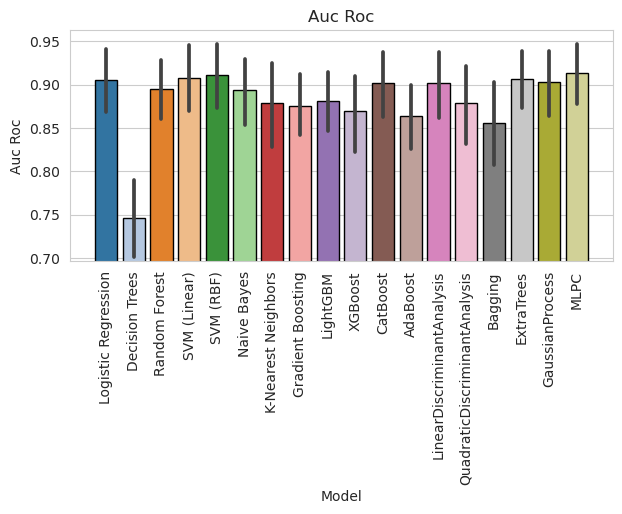

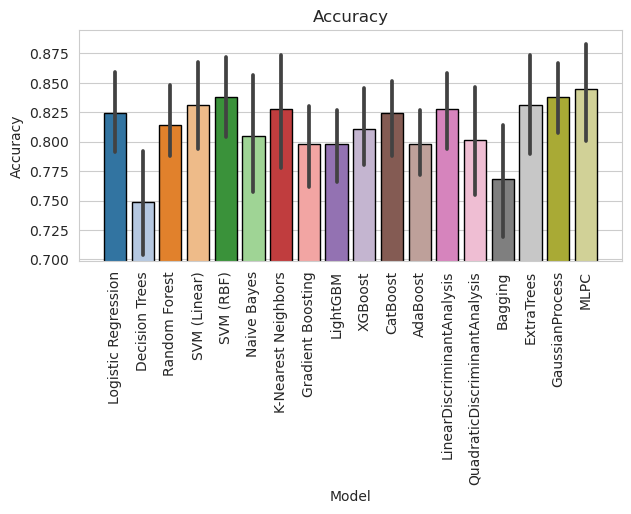

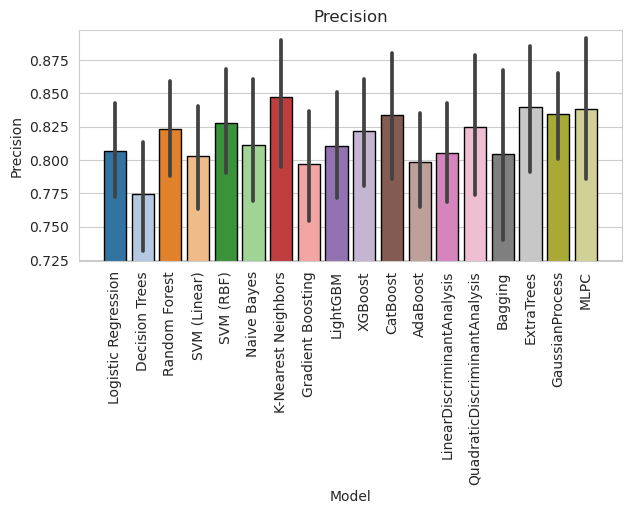

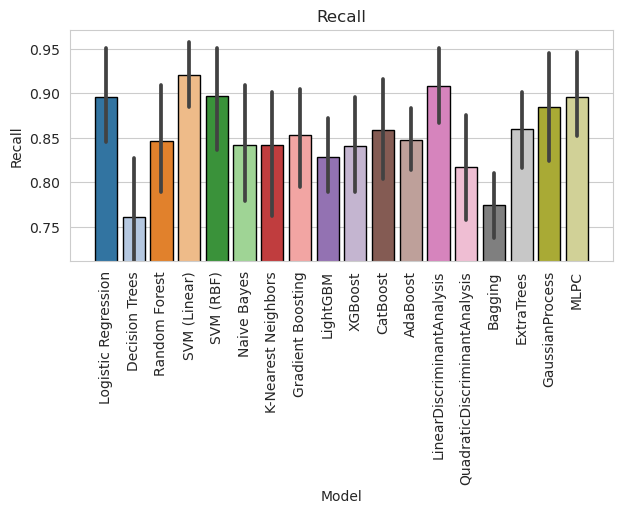

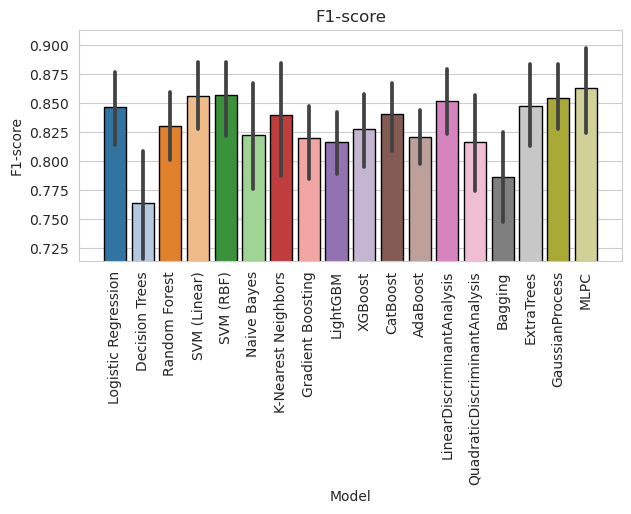

In [ ]:
for feature in CVSummary.drop(["Fold", "Model"], axis = 1).columns:

    plot_performance(data = CVSummary, feature = feature,
                     zoom = 0.05, palette = "tab20")

In [ ]:
CVSummary.drop("Fold", axis = 1).groupby("Model").mean().sort_values(by = "Accuracy", ascending = False).head(3)

,Auc Roc,Accuracy,Precision,Recall,F1-score
Model,,,,,
MLPC,0.912847,0.844731,0.838027,0.896324,0.862745
GaussianProcess,0.902830,0.837957,0.834180,0.884559,0.854325
SVM (RBF),0.911205,0.837849,0.827768,0.896691,0.856549


In [ ]:
Baseline

,Accuracy
Zero Rate,0.456954
Random Rate Classifier,0.503706


After performing a 10-fold cross-validation on various classification models, three standout performers have emerged, making them particularly promising candidates for further improvement through voting in order to create a new model. These models are the Multi-layer Perceptron (MLP) Classifier, the Gaussian Process Classifier, and the Support Vector Machine (SVM) with a Radial Basis Function (RBF) kernel. Lets explore each one:

1. **Multi-layer Perceptron (MLP) Classifier:**
The Multi-layer Perceptron is a type of artificial neural network, consisting of multiple layers of interconnected nodes (neurons). It is a powerful model capable of learning complex patterns and relationships in the data. Through the cross-validation process, the MLP Classifier demonstrated exceptional performance, indicating its potential to accurately capture non-linear associations in the dataset. Fine-tuning its hyperparameters, such as the number of hidden layers, the number of neurons in each layer, and the learning rate, may further enhance its predictive capabilities.

2. **Gaussian Process Classifier:**
The Gaussian Process Classifier is a probabilistic model that leverages Gaussian Processes to model the underlying distribution of the data. It is particularly useful when dealing with small datasets, as it can provide valuable uncertainty estimates for predictions. In the cross-validation experiment, the Gaussian Process Classifier showcased strong performance, suggesting its ability to capture the data's inherent uncertainty and make robust predictions. By refining its kernel parameters and noise level, we can potentially optimize its performance for the specific dataset at hand.

3. **Support Vector Machine (SVM) with Radial Basis Function (RBF) kernel:**
The Support Vector Machine is a powerful and versatile classification algorithm that aims to find the optimal hyperplane to separate data points of different classes. The Radial Basis Function kernel is widely used in SVM for handling non-linearly separable data. In the 10-fold cross-validation, the SVM with RBF kernel demonstrated superior classification accuracy, indicating its suitability for capturing complex decision boundaries. By tuning the SVM's regularization parameter (C) and the kernel parameter (gamma), we can fine-tune its performance and achieve even better generalization on unseen data.

## Voting model

A Hard Voting Classifier, also known as Majority Voting Classifier, is an ensemble machine learning technique used in classification tasks. It combines the predictions of multiple individual classifiers (also known as base classifiers) to make the final prediction. The Hard Voting Classifier takes the majority vote from the individual classifiers to determine the final class label.

In [ ]:
from sklearn.ensemble import VotingClassifier

SGK = StratifiedKFold(n_splits = 10, shuffle = True, random_state = random_state)

# Metrics arrays
accuracy, precision, recall, f1score = list(), list(), list(), list()

# Information arrays
namelist, kfold = list(), list()

#Models
Models = [MLPClassifier(random_state = random_state),
          GaussianProcessClassifier(random_state = random_state),
          SVC(probability = True, random_state = random_state, kernel = "rbf")]

In [ ]:
%%time

for fold, (train_index, validation_index) in enumerate(SGK.split(X, y)):

    # Creating each fold dataset

    X_train, y_train = X.loc[train_index], y.loc[train_index]

    X_validation, y_validation = X.loc[validation_index], y.loc[validation_index]

    # Scaling the data

    scaler = MinMaxScaler()

    scaler.fit(X_train)

    X_train, X_validation = scaler.transform(X_train), scaler.transform(X_validation)

    print(f"Fold {fold + 1} -", end = " ")

   # Classifiers
    classifier1 = Models[0]
    classifier2 = Models[1]
    classifier3 = Models[2]

    # VotingClassifier
    voting_classifier = VotingClassifier(estimators = [('MLPClassifier', classifier1),
                                                       ('GaussianProcessClassifier', classifier2),
                                                      ('SVC', classifier3)], voting = 'hard')
    # Fitting
    voting_classifier.fit(X_train, y_train)

    # Predicting validation fold
    prediction = voting_classifier.predict(X_validation)

    # Recording results
    accuracy.append(accuracy_score(y_validation, prediction))
    precision.append(precision_score(y_validation, prediction, average = 'binary'))
    recall.append(recall_score(y_validation, prediction, average = 'binary'))
    f1score.append(f1_score(y_validation, prediction, average = 'binary'))
    kfold.append(fold + 1)

    print("Completed")

Fold 1 - Completed
Fold 2 - Completed
Fold 3 - Completed
Fold 4 - Completed
Fold 5 - Completed
Fold 6 - Completed
Fold 7 - Completed
Fold 8 - Completed
Fold 9 - Completed
Fold 10 - Completed
CPU times: user 11.4 s, sys: 9.23 s, total: 20.7 s
Wall time: 5.2 s


In [ ]:
VotingSummary = pd.DataFrame()
VotingSummary['Accuracy'] = accuracy
VotingSummary['Precision'] = precision
VotingSummary['Recall'] = recall
VotingSummary['F1-score'] = f1score
VotingSummary['Fold'] = kfold
VotingSummary['Model'] = ["VotingClassifier"] * 10

In [ ]:
VotingSummary.drop("Fold", axis = 1).groupby("Model").mean()

,Accuracy,Precision,Recall,F1-score
Model,,,,
VotingClassifier,0.837957,0.840634,0.878309,0.853644


In [ ]:
for feature in VotingSummary.drop(['Fold', 'Model'], axis = 1).columns:

    print(feature)
    print(f' Min: {round(VotingSummary[feature].min(), 2)}\n Max: {round(VotingSummary[feature].max(), 2)}')

Accuracy
 Min: 0.73
 Max: 0.9
Precision
 Min: 0.72
 Max: 0.93
Recall
 Min: 0.71
 Max: 1.0
F1-score
 Min: 0.76
 Max: 0.92


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_validation, prediction))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.80      1.00      0.89        16

    accuracy                           0.87        30
   macro avg       0.90      0.86      0.86        30
weighted avg       0.89      0.87      0.86        30



In [ ]:
pd.DataFrame(confusion_matrix(y_validation, prediction), columns = ["Positive", "Negative"], index = ["Positive", "Negative"])

,Positive,Negative
Positive,10,4
Negative,0,16


# Final Solution

In the final stage of building our classification solution, we will utilize the entire dataset for training, maximizing the amount of information available to our model. To create a robust and accurate ensemble classifier, we will combine three diverse and high-performing classifiers: the Multi-layer Perceptron (MLP) Classifier, the Gaussian Process Classifier, and the Support Vector Machine (SVM) with a Radial Basis Function (RBF) kernel.

In [ ]:
# Scaling the data

scaler = MinMaxScaler()

X = scaler.fit_transform(X)

# Classifiers
classifier1 = Models[0]
classifier2 = Models[1]
classifier3 = Models[2]

# VotingClassifier
voting_classifier = VotingClassifier(estimators = [('MLPClassifier', classifier1),
                                                   ('GaussianProcessClassifier', classifier2),
                                                   ('SVC', classifier3)], voting = 'hard')

# Fitting
voting_classifier.fit(X, y)

VotingClassifier(estimators=[('MLPClassifier', MLPClassifier(random_state=18)),
                             ('GaussianProcessClassifier',
                              GaussianProcessClassifier(random_state=18)),
                             ('SVC', SVC(probability=True, random_state=18))])

In [ ]:
import random

i = random.randint(0, 303)

testing_x = data.drop("output", axis = 1).iloc[i]

real_y = data['output'].iloc[i]

In [ ]:
testing_x = scaler.transform(testing_x.values.reshape(1, -1))

In [ ]:
voting_classifier.predict(testing_x)

array([1])

In [ ]:
real_y

1

# Save Specifications, load and predict data

Folder Structure:
>Create a parent folder for your project. Name it descriptively and without blank spaces.
>Inside the main folder, create subfolders to organize different components of the project, such as source code, data, trained models, documentation, etc.

Version control:
>Use a version control system like Git to track and manage revisions to your project over time.
         You can create a Git repository inside your project's main folder.

Virtual environment:
>Create a virtual environment for your project using virtualenv or conda. This helps isolate your project's dependencies from other Python installations on your system.

Requirements:
>Create a requirements file (requirements.txt) that lists all the libraries and versions used in your project. This makes it easy to replicate the environment on other machines.

Documentation:
>Create a README file that describes the purpose of the project, how to set it up, run it, and any other relevant information.
>Document the key functions and classes in your code with clear and concise comments.

File Structure:
>Maintain an organized structure for your source code files. Separate them into modules or bundles if necessary.
         Use descriptive file and folder names.

Save and Backup Data:
>Save the data you need in specific subfolders and avoid placing data directly in the project folder.
         If you work with large data sets, consider using tools like DVC (Data Version Control) to manage data efficiently.

Configuration Files:
>If your project needs specific settings, save these settings in separate files (for example, an .env file for environment variables).

Tests and Validation:
>Implement unit and integration tests to verify that your code works as expected.
         Use testing tools like unittest or pytest.

Comments and Internal Documentation:
>Include comments in your code to explain the purpose and functionality of important parts.
>Document functions and classes using docstrings.

Output Files and Trained Models:
>If your project generates output files, such as charts, reports, or trained models, create specific subfolders for these files.

Backups and Cloud Storage:
>Make regular backup copies of your project and save them in a safe location.
>Consider storing the project in the cloud (eg GitHub, GitLab, Bitbucket) for easy collaboration and access from different devices.


Script Execution:
>If your project involves execution scripts, name them descriptively and organize them in a subfolder (for example, scripts).